<a href="https://colab.research.google.com/github/domsoria/ESEMPI-COLAB/blob/main/maskNoMaskClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#from keras.applications import MobileNetV2, mobilenet_v2 
from keras.applications import InceptionV3, inception_v3 
from keras.layers import Dense 
from keras.models import Model 
from keras.preprocessing.image import ImageDataGenerator 
from keras.optimizers import Adam 
import pathlib 
import math
import tensorflow as tf

<h3>importiamo il backbone della rete MobilnetV2</h3>

In [48]:
#backbone = MobileNetV2(weights='imagenet', include_top=False, pooling="avg")
backbone = InceptionV3(weights='imagenet', include_top=False, pooling="avg")



87916544/87910968 [==============================] - 0s 0us/step


<h3>freeziamo i pesi  del backbone e rendiamo  i livelli del backbone non trainable</h3>



In [49]:
for l in backbone.layers: 
  l.trainable = False

creiamo il pezzo della rete  dense che imparerà a classificare utilizzando come input della rete di coda l'output del backbone

In [50]:
x = backbone.output 
x = Dense(1024, activation='relu')(x) 
x = Dense(1024, activation='relu')(x) 
x = Dense(512, activation='relu')(x)

inseriamo in coda una  softmax che restituisce la valutazione della classificazione in termini di probabilità

In [51]:
classificatore = Dense(2, activation='softmax')(x)

Creaimo il modello globale

In [52]:
model = Model(inputs=backbone.input, outputs=classificatore)

In [19]:
#model.summary()

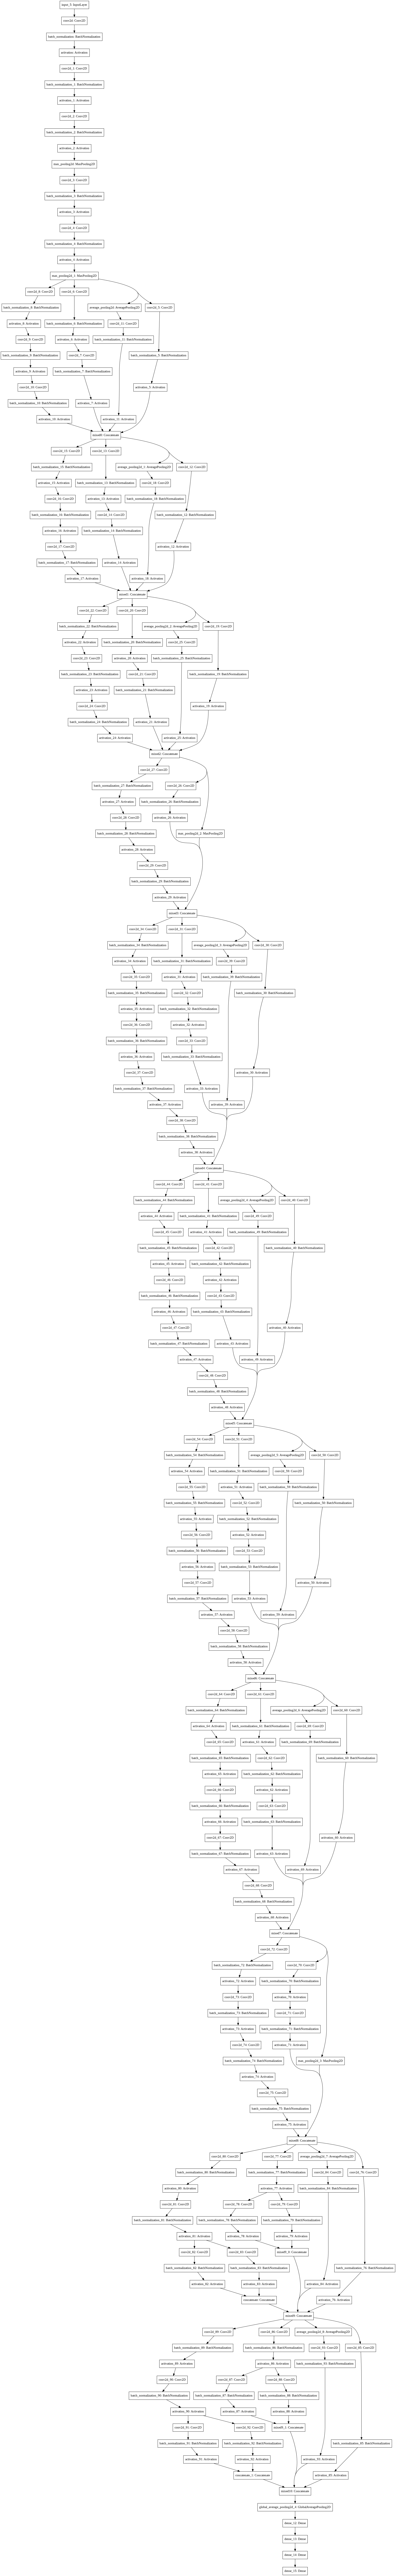

In [53]:
tf.keras.utils.plot_model(model,show_layer_names=True)

<h3>Compiliamo  il modello indicando la loss function e l’ottimizzatore da utilizzare</h3>

In [54]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

<h3>Scarichiamo il file zip contente il dataset</h3>



In [40]:
!wget https://www.domsoria.com/download/DATASET/MASKNOMASK/datasetMaskNoMask.zip 

--2021-02-13 23:36:11--  https://www.domsoria.com/download/DATASET/MASKNOMASK/datasetMaskNoMask.zip%C2%A0
Resolving www.domsoria.com (www.domsoria.com)... 89.46.106.47
Connecting to www.domsoria.com (www.domsoria.com)|89.46.106.47|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.domsoria.com/download/DATASET/MASKNOMASK/datasetMaskNoMask.zip [following]
--2021-02-13 23:36:14--  https://www.domsoria.com/download/DATASET/MASKNOMASK/datasetMaskNoMask.zip
Reusing existing connection to www.domsoria.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 53399909 (51M) [application/zip]
Saving to: ‘datasetMaskNoMask.zip .1’

datasetMaskNoMask.z 100%[===================>]  50.93M  20.8MB/s    in 2.5s    

2021-02-13 23:36:17 (20.8 MB/s) - ‘datasetMaskNoMask.zip .1’ saved [53399909/53399909]



<h3>Decomprimo il file scaricato<h3>

In [41]:
!unzip -a datasetMaskNoMask.zip  -d "dataset"
!rm -rf dataset/__MACOSX # rimuovo una cartella inutile creata con lo zip

Archive:  datasetMaskNoMask.zip 
  inflating: dataset/__MACOSX/._con_mask  [binary]
replace dataset/con_mask/0-with-mask.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/con_mask/0-with-mask.jpg  [binary]
  inflating: dataset/__MACOSX/con_mask/._0-with-mask.jpg  [binary]
  inflating: dataset/con_mask/1-with-mask.jpg  [binary]
  inflating: dataset/__MACOSX/con_mask/._1-with-mask.jpg  [binary]
  inflating: dataset/con_mask/10-with-mask.jpg  [binary]
  inflating: dataset/__MACOSX/con_mask/._10-with-mask.jpg  [binary]
  inflating: dataset/con_mask/100-with-mask.jpg  [binary]
  inflating: dataset/__MACOSX/con_mask/._100-with-mask.jpg  [binary]
  inflating: dataset/con_mask/101-with-mask.jpg  [binary]
  inflating: dataset/__MACOSX/con_mask/._101-with-mask.jpg  [binary]
  inflating: dataset/con_mask/103-with-mask.jpg  [binary]
  inflating: dataset/__MACOSX/con_mask/._103-with-mask.jpg  [binary]
  inflating: dataset/con_mask/104-with-mask.jpg  [binary]
  inflating: dataset/__M

<h3>inizializzo il path del dataset che ho scaricato </h3>

In [55]:
dataset_dir = pathlib.Path('dataset/')

<h3>creo i dataset di train e di validation utilizzando ImageDataGenerator, In questo caso  ho indicato di fare anche un pò di augmetation attraverso l'uso di zoom e flip e di dividere  il dataset in uno di training ed uno di validation con un rapporto 80% - 20% attraverso l'uso del parametro validation_split=0.2</h3>

In [56]:
datagen = ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input, 
                             rescale=1./255, shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             validation_split=0.2) # set validation split

In [57]:
train_data = datagen.flow_from_directory(dataset_dir, 
                                         target_size=(224, 224), 
                                         color_mode='rgb',
                                         batch_size=32, 
                                         class_mode='categorical',
                                         shuffle=True, subset='training') 

val_data = datagen.flow_from_directory(dataset_dir, 
                                       target_size=(224, 224), 
                                       color_mode='rgb',
                                       batch_size=32, 
                                       class_mode='categorical',
                                       shuffle=True, 
                                       subset='validation')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [62]:
model.fit(train_data, steps_per_epoch=math.ceil(train_data.n / train_data.batch_size), epochs=50, verbose=1, validation_data=val_data)

Epoch 1/50
35/35 [==============================] - 18s 518ms/step - loss: 0.0572 - accuracy: 0.9791 - val_loss: 0.2574 - val_accuracy: 0.9382
Epoch 2/50
35/35 [==============================] - 18s 504ms/step - loss: 0.0680 - accuracy: 0.9755 - val_loss: 0.2559 - val_accuracy: 0.9055
Epoch 3/50
35/35 [==============================] - 18s 497ms/step - loss: 0.0763 - accuracy: 0.9682 - val_loss: 0.2006 - val_accuracy: 0.9418
Epoch 4/50
35/35 [==============================] - 18s 501ms/step - loss: 0.0686 - accuracy: 0.9691 - val_loss: 0.3065 - val_accuracy: 0.9164
Epoch 5/50
35/35 [==============================] - 18s 499ms/step - loss: 0.1415 - accuracy: 0.9419 - val_loss: 0.2650 - val_accuracy: 0.9236
Epoch 6/50
35/35 [==============================] - 18s 497ms/step - loss: 0.0623 - accuracy: 0.9764 - val_loss: 0.3058 - val_accuracy: 0.9055
Epoch 7/50
35/35 [==============================] - 18s 507ms/step - loss: 0.0779 - accuracy: 0.9691 - val_loss: 0.3127 - val_accuracy: 0.9091

Salviamo il modello

In [63]:
from google.colab import drive
drive.mount('/content/drive')
model.save_weights('drive/MyDrive/Colab Notebooks/MASKNOMASK/model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
